In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [243]:
pas_data = pd.read_csv('/home/dmitry/jupyter/лаб2/cneos_fireball_data.csv', sep = ',')
pas_data

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [244]:
pas_data.loc[[pas_data['Total Radiated Energy (J)'].idxmax(axis=0)], "Latitude (deg.)" : "Altitude (km)"]


,Latitude (deg.),Longitude (deg.),Altitude (km)
146,54.8N,61.1E,23.3


In [245]:
pas_data.loc[[pas_data['Velocity (km/s)'].idxmax(axis=0)]]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
67,2015-07-04 01:40:11,38.6N,103.1E,46.3,49.0,0.9,-40.4,-27.7,5.600000e+10,0.18


In [246]:
pas_data.loc[[pas_data['Velocity (km/s)'].idxmin(axis=0)]]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
300,2008-07-01 17:40:19,37.1N,115.7W,36.1,9.8,2.8,1.7,-9.2,3.600000e+10,0.12


In [247]:
Latitude = []
for i in range (719):
    s = pas_data.iloc[i]["Latitude (deg.)"]
    s2 = ''
    if (isinstance(s, str)):
        if (s[len(s)-1] == 'N'):
            for j in range (len(s)-1):
                s2 = s2 + s[j]
            s3 = float(s2)
            Latitude.append(s3)
        else:
            for k in range (len(s)-1):
                s2 = s2 + s[k]
            s3 = -float(s2) 
            Latitude.append(s3)
Lat = round(np.average(Latitude),1) 
if (Lat < 0):
    Lat = Lat * -1.0
    finLat = str(Lat) + 'S'
else:
    finLat = str(Lat) + 'N'
print('Среднее значение широты: ',finLat)

Среднее значение широты:  2.1S


In [248]:
Longitude = []
for i in range (719):
    s = pas_data.iloc[i]["Longitude (deg.)"]
    s2 = ''
    if (isinstance(s, str)):
        if (s[len(s)-1] == 'E'):
            for j in range (len(s)-1):
                s2 = s2 + s[j]
            s3 = float(s2)
            Longitude.append(s3)
        else:
            for k in range (len(s)-1):
                s2 = s2 + s[k]
            s3 = -float(s2) 
            Longitude.append(s3)
Lon = round(np.average(Longitude),1) 
if (Lat < 0):
    Lat = Lat * -1.0
    finLon = str(Lat) + 'W'
else:
    finLon = str(Lon) + 'E'
print('Среднее значение долготы: ',finLon)

Среднее значение долготы:  5.0E


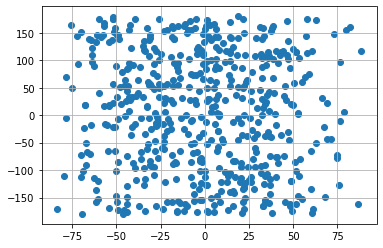

In [249]:
plt.scatter(Latitude, Longitude)
plt.grid()
plt.show()

<AxesSubplot:>

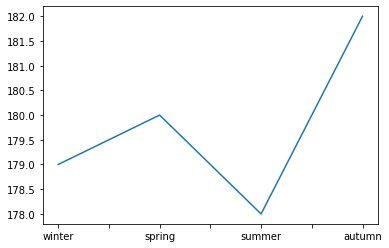

In [250]:
def get_data(name):
    return name.split('-')[1]
month = pas_data['Peak Brightness Date/Time (UT)'].apply(get_data)
winter = month[(month == "01") | (month == "02") | (month == "12")].count()
spring = month[(month == "03") | (month == "04") | (month == "05")].count()
summer = month[(month == "06") | (month == "07") | (month == "08")].count()
autumn = month[(month == "09") | (month == "10") | (month == "11")].count()
s = pd.Series([winter, spring, summer, autumn], index = ['winter', 'spring', 'summer', 'autumn'])
s[s == s.max()]
s.plot()

In [251]:
pas_data

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [252]:

pas_data2 = pas_data.dropna(axis = 0, subset=['Velocity (km/s)'])
pas_data2

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52
5,2017-06-20 13:41:32,54.2S,133.0E,33.3,13.6,8.7,-5.7,8.8,6.360000e+11,1.60
...,...,...,...,...,...,...,...,...,...,...
450,2004-04-22 04:21:49,44.3S,83.3E,29.6,16.3,8.5,-12.1,-6.8,6.240000e+11,1.50
451,2004-04-06 03:24:49,12.0S,162.8E,35.0,25.6,10.5,-23.2,-2.9,4.330000e+11,1.10
462,2003-11-10 13:54:06,64.5S,136.2E,23.0,20.1,14.8,-8.7,10.4,5.180000e+11,1.30
467,2003-09-27 12:59:02,21.0N,86.6E,26.0,18.2,-1.0,-5.4,-17.3,2.150000e+12,4.60


<AxesSubplot:xlabel='time'>

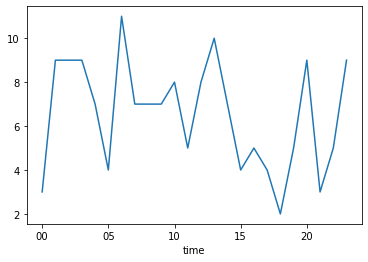

In [253]:
def get_time(name):
    return name.split()[1].split(':')[0]
time = pas_data2['Peak Brightness Date/Time (UT)'].apply(get_time)
pas_data2.groupby(time)['Peak Brightness Date/Time (UT)'].count().plot(xlabel = "time")

In [256]:
pas_data3 = pas_data.fillna(666)
pas_data3

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,666.0,666.0,666.0,666.0,666.0,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,666.0,666.0,666.0,666.0,666.0,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,666.0,666.0,666.0,666.0,666.0,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,666.0,666.0,666.0,666.0,666.0,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,666.0,666.0,666.0,666.0,666.0,2.500000e+12,5.200


<AxesSubplot:xlabel='month'>

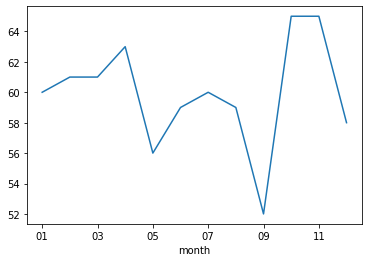

In [258]:
def get_data(name):
    return name.split('-')[1]
month = pas_data['Peak Brightness Date/Time (UT)'].apply(get_data)
m = max(pas_data.groupby(month)['Peak Brightness Date/Time (UT)'].count())
arr = pas_data.groupby(month)['Peak Brightness Date/Time (UT)'].count()
arr[arr == m]
arr.plot(xlabel = "month")

<AxesSubplot:ylabel='Frequency'>

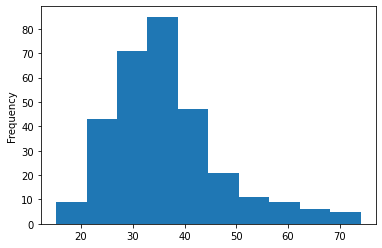

In [267]:
from scipy import stats
stats.pearsonr(pas_data3['Altitude (km)'], pas_data3['Total Radiated Energy (J)'])
stats.spearmanr(pas_data3['Altitude (km)'], pas_data3['Total Radiated Energy (J)'])
pas_data['Altitude (km)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

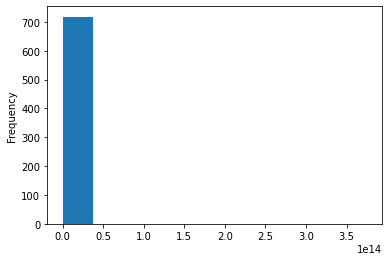

In [268]:
pas_data['Total Radiated Energy (J)'].plot.hist()